In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
    (KMeans,
     AgglomerativeClustering)
from scipy.cluster.hierarchy import \
    (dendrogram,
     cut_tree)
from ISLP.cluster import compute_linkage
from sympy.printing.pretty.pretty_symbology import line_width

In [9]:
np.random.seed(3)
X = np.random.standard_normal((50, 2))
X[:25, 0] += 3
X[:25, 1] -= 4

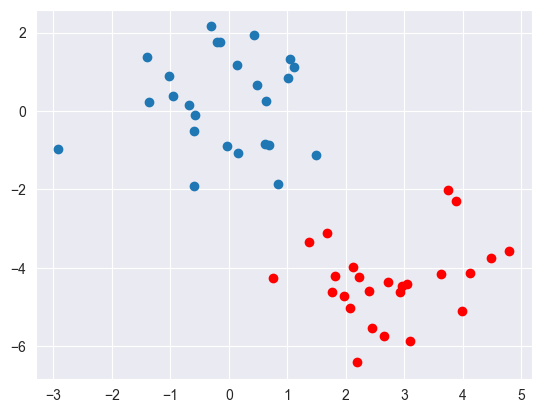

In [10]:
plt.scatter(X[:25, 0], X[:25, 1], c = 'red')
plt.scatter(X[25:50, 0], X[25:50, 1])

In [11]:
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init = 1).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

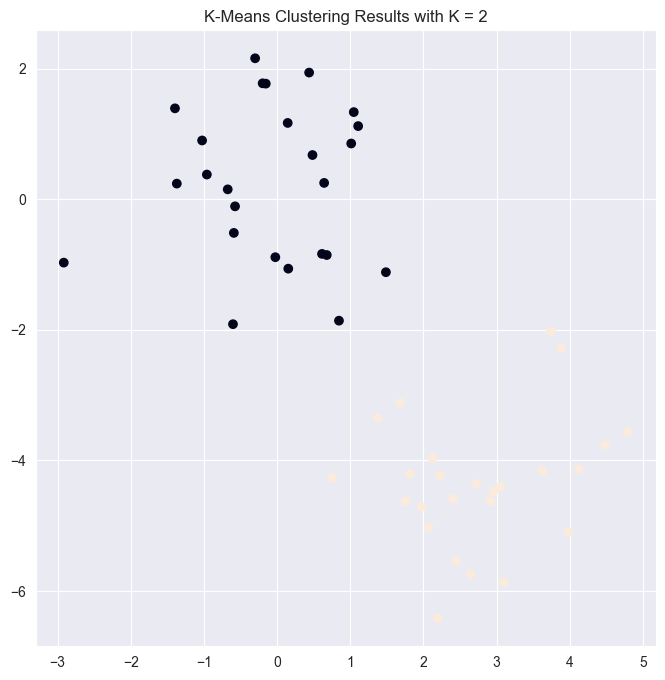

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans.labels_)
ax.set_title('K-Means Clustering Results with K = 2');

In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 3, n_init = 1).fit(X)
kmeans.inertia_

84.32000294680908

In [14]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2], dtype=int32)

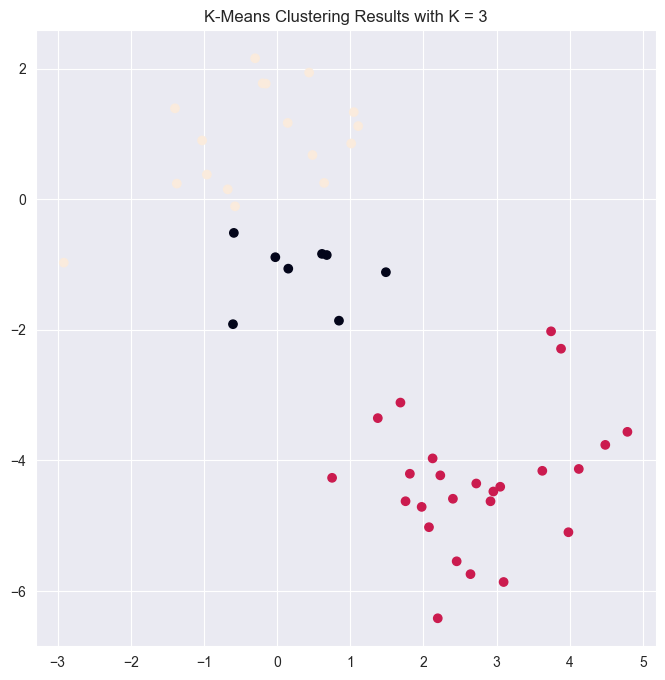

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans.labels_)
ax.set_title('K-Means Clustering Results with K = 3');

In [16]:
kmeans20 = KMeans(n_clusters = 3, random_state = 3, n_init = 20).fit(X)
kmeans20.inertia_

82.14444621369404

In [17]:
kmeans20.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0], dtype=int32)

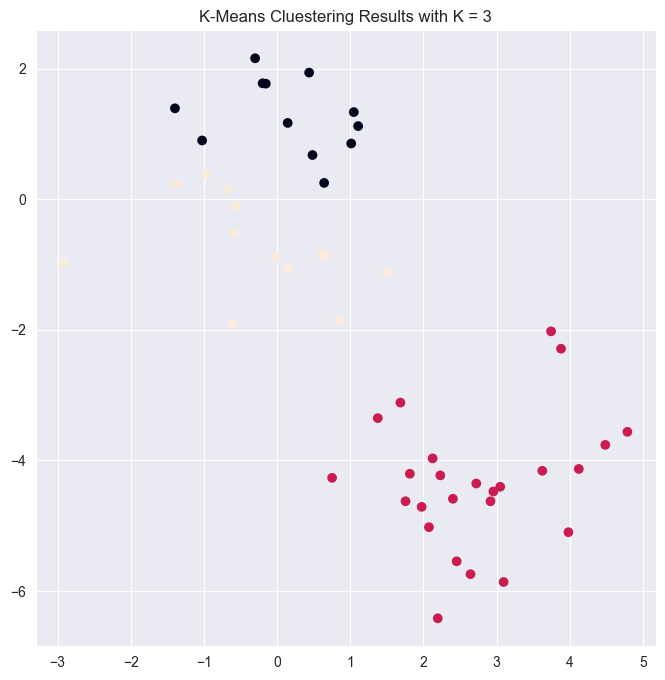

In [18]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans20.labels_)
ax.set_title('K-Means Cluestering Results with K = 3');

# Question 1
What will happen if we use K = 4?  Run the algorithm a few times with n_init = 1.  Graph the results each time so you can compare them. Also compute the total within-cluster variations and compare.  Are the results fairly stable? Now run the kmeans() function with n_init = 50 and compare this to the other results.

If we use K = 4 we will get 4 clusters instead of just 3, so each cluster should be smaller and be closer together.  I ran the algorithm 3 times with n_init = 1 3 times and I noticed that the clusters would change quite dramatically from trial to trial and have completely different groups of points clustered together.  I ran the kmeans() function 3 times with n_init = 50 and my results were much more stable, to the point where I almost couldnt tell any differences other than different colors occasionally but same points clustered.

In [29]:
kmeans1 = KMeans(n_clusters = 4, n_init = 1).fit(X)
kmeans1.inertia_

61.2679397619806

In [30]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2], dtype=int32)

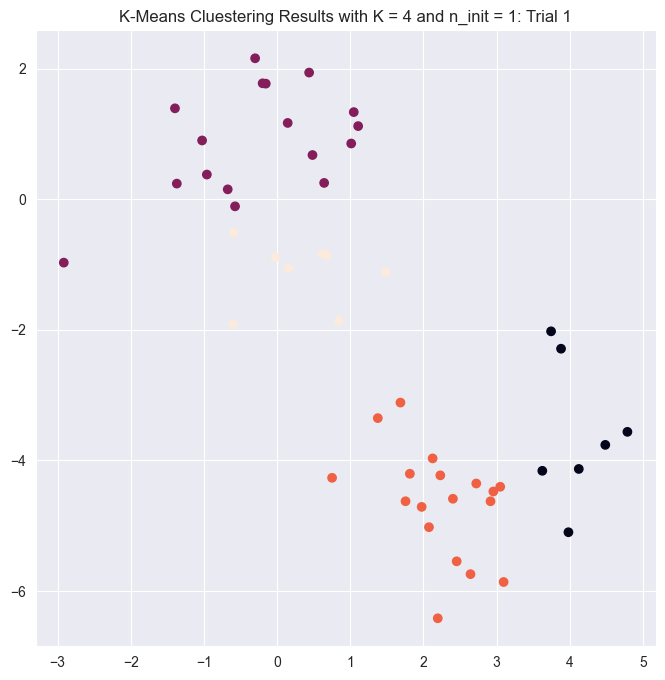

In [31]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans1.labels_)
ax.set_title('K-Means Cluestering Results with K = 4 and n_init = 1: Trial 1');

In [32]:
kmeans2 = KMeans(n_clusters = 4, n_init = 1).fit(X)
kmeans2.inertia_

69.87345590203368

In [33]:
kmeans2.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 3], dtype=int32)

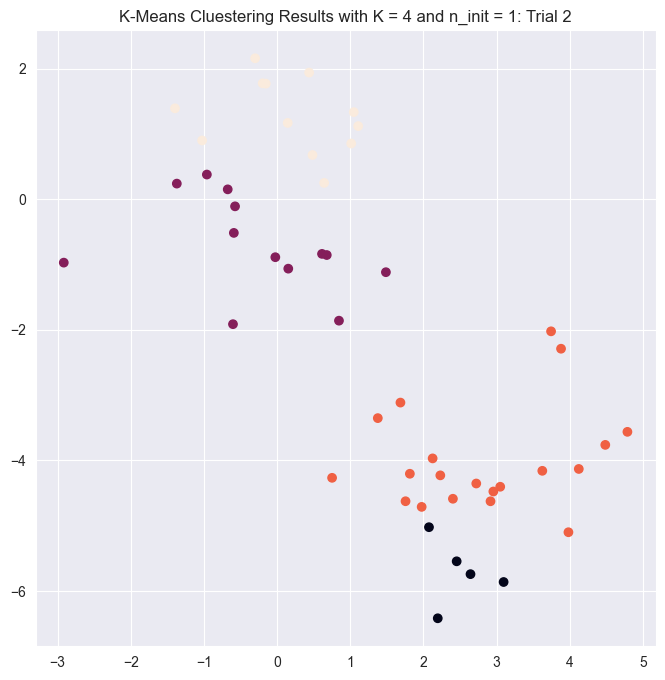

In [34]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans2.labels_)
ax.set_title('K-Means Cluestering Results with K = 4 and n_init = 1: Trial 2');

In [36]:
kmeans3 = KMeans(n_clusters = 4, n_init = 1).fit(X)
kmeans3.inertia_

59.459066889275974

In [37]:
kmeans3.labels_

array([3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0], dtype=int32)

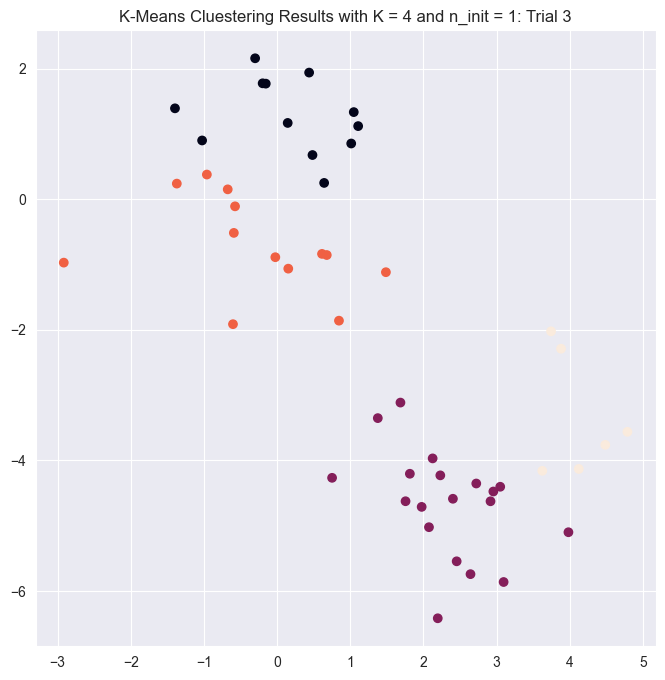

In [38]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans3.labels_)
ax.set_title('K-Means Cluestering Results with K = 4 and n_init = 1: Trial 3');

In [39]:
kmeans4 = KMeans(n_clusters = 4, n_init = 50).fit(X)
kmeans4.inertia_

59.092383028865555

In [40]:
kmeans4.labels_

array([1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

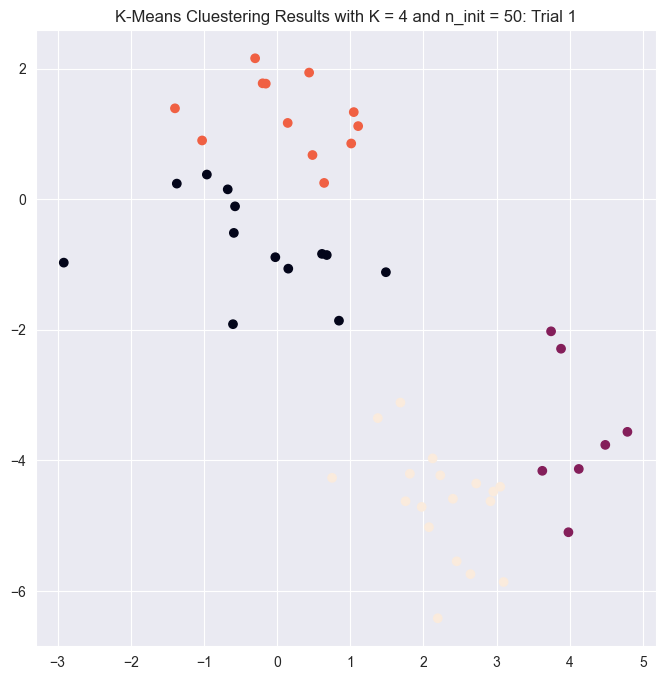

In [41]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans4.labels_)
ax.set_title('K-Means Cluestering Results with K = 4 and n_init = 50: Trial 1');

In [42]:
kmeans5 = KMeans(n_clusters = 4, n_init = 50).fit(X)
kmeans5.inertia_

59.092383028865555

In [43]:
kmeans5.labels_

array([0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 3], dtype=int32)

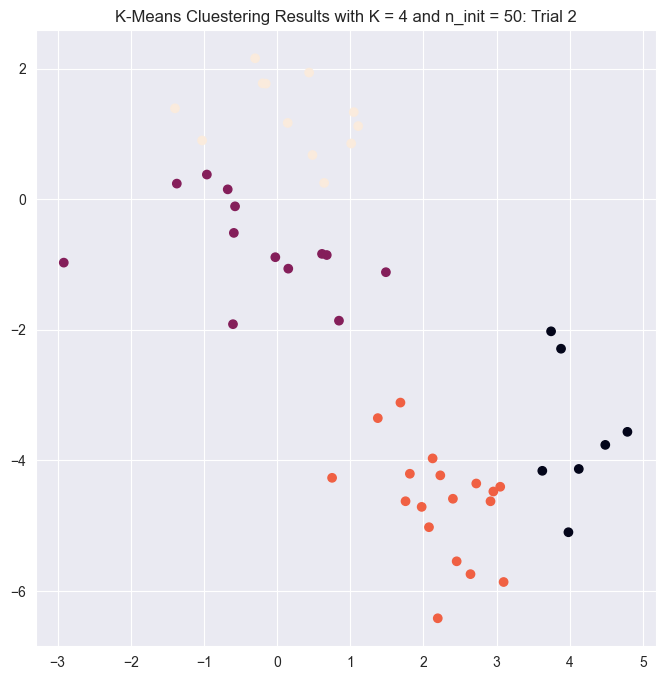

In [44]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans5.labels_)
ax.set_title('K-Means Cluestering Results with K = 4 and n_init = 50: Trial 2');

In [45]:
kmeans6 = KMeans(n_clusters = 4, n_init = 50).fit(X)
kmeans6.inertia_

59.092383028865555

In [46]:
kmeans6.labels_

array([1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0], dtype=int32)

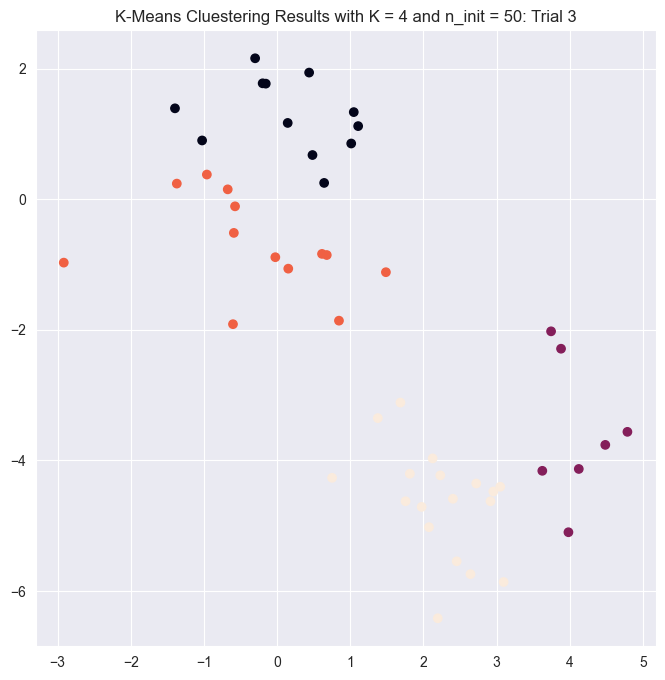

In [48]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = kmeans6.labels_)
ax.set_title('K-Means Cluestering Results with K = 4 and n_init = 50: Trial 3');

In [49]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

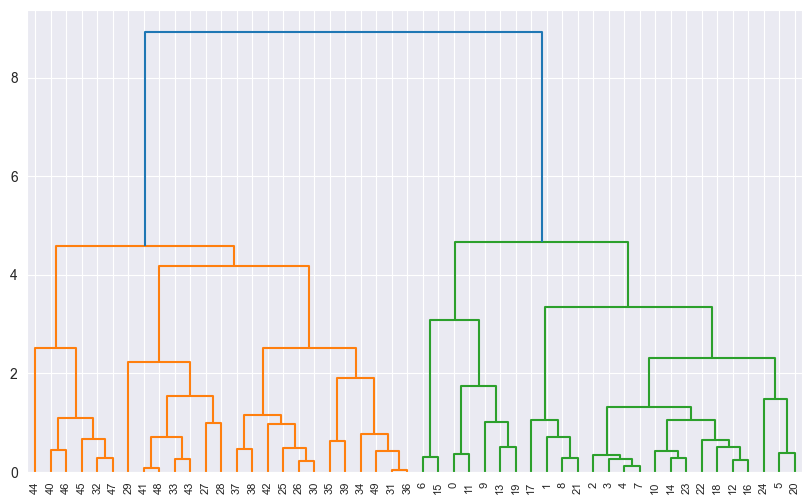

In [50]:
linkage_comp = compute_linkage(hc_comp)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
dendrogram(linkage_comp,
           ax = ax,
           color_threshold = 7);

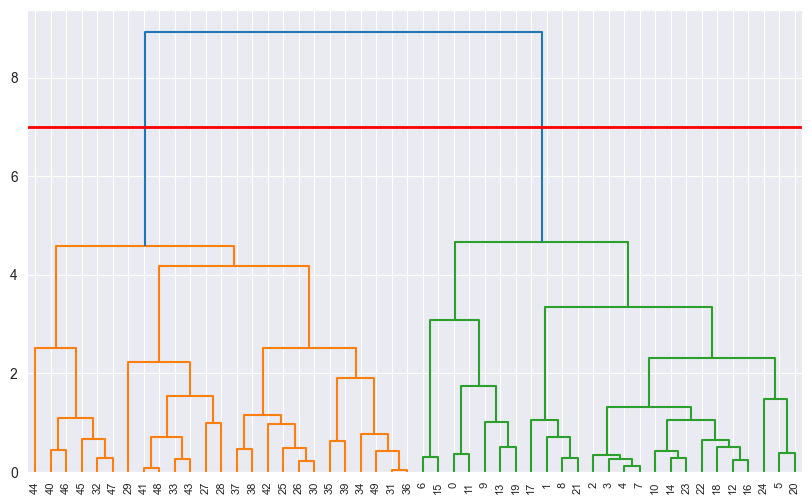

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
dendrogram(linkage_comp,
           ax = ax,
           color_threshold = 7);
ax.axhline(7, c = 'red', linewidth = 2);

In [52]:
hc_labels = cut_tree(linkage_comp, n_clusters = 2).T
hc_labels

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

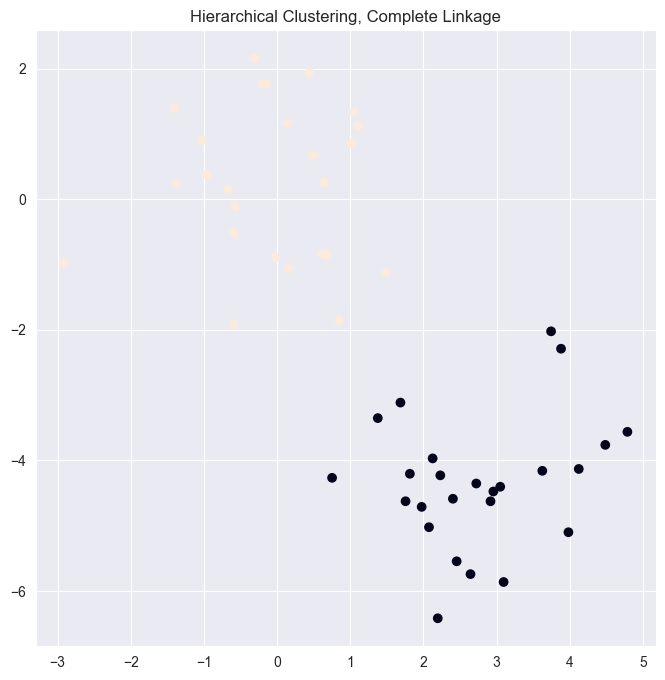

In [54]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = hc_labels)
ax.set_title('Hierarchical Clustering, Complete Linkage');

In [55]:
hc_avg = HClust(distance_threshold = 0,
                n_clusters = None,
                linkage = 'average');
hc_avg.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

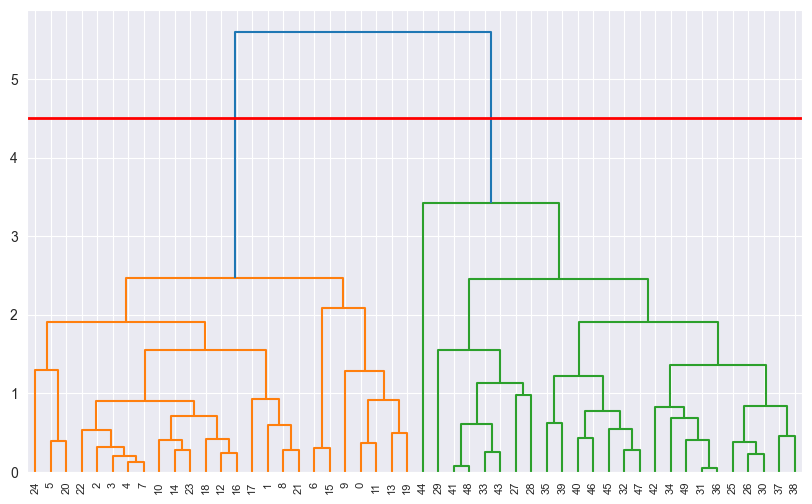

In [56]:
linkage_comp_avg = compute_linkage(hc_avg)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
dendrogram(linkage_comp_avg,
           ax = ax,
           color_threshold = 4.5);
ax.axhline(4.5, c = 'red', linewidth = 2);

In [57]:
hc_labels_avg = cut_tree(linkage_comp_avg, n_clusters = 2).T
hc_labels_avg

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

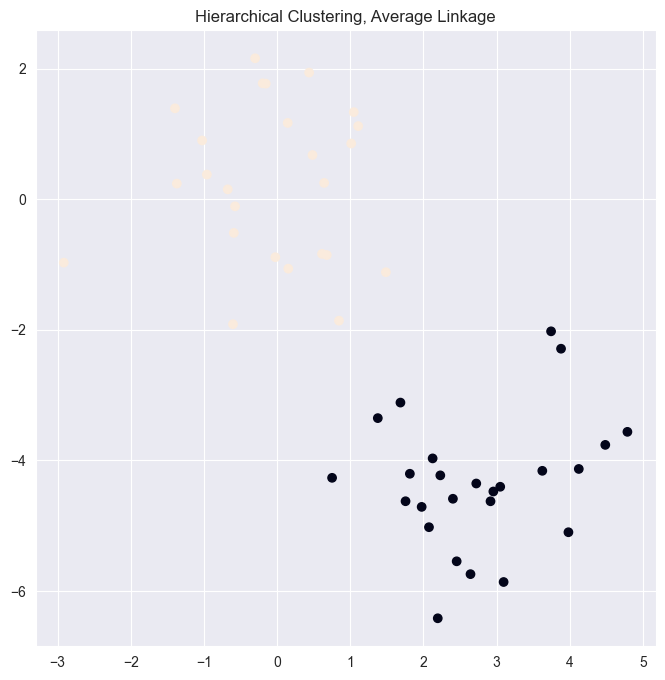

In [58]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = hc_labels_avg)
ax.set_title('Hierarchical Clustering, Average Linkage');

In [59]:
hc_single = HClust(distance_threshold = 0,
                   n_clusters = None,
                   linkage = 'single');
hc_single.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

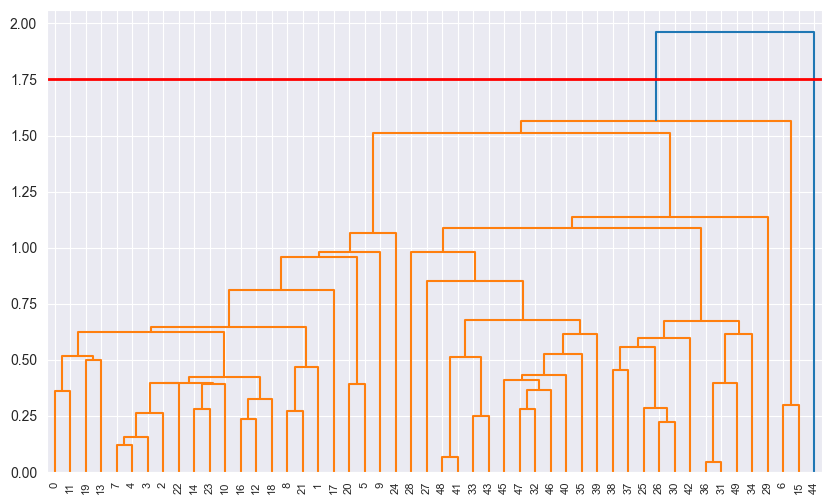

In [63]:
linkage_comp_single = compute_linkage(hc_single)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
dendrogram(linkage_comp_single,
           ax = ax,
           color_threshold = 1.75);
ax.axhline(1.75, c = 'red', linewidth = 2);

In [64]:
hc_labels_single = cut_tree(linkage_comp_single, n_clusters = 2).T
hc_labels_single

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0]])

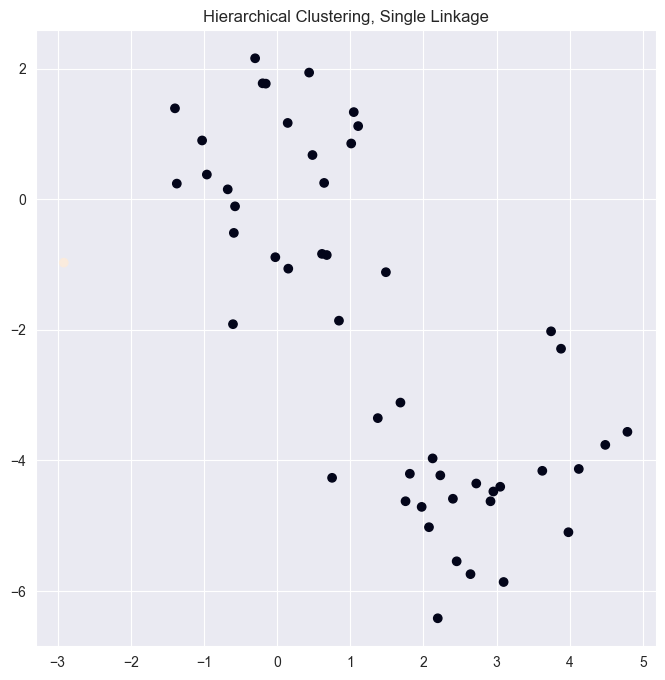

In [66]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X[:,0], X[:,1], c = hc_labels_single)
ax.set_title('Hierarchical Clustering, Single Linkage');